<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.202801,22.548541,23.417917,62.102989,2.409910,164.682157,160.905730,3.776427
1,0.0,1.0,95.235106,65.956753,76.372251,45.080897,3.546367,296.191374,293.825736,2.365638
2,0.0,2.0,94.109022,72.160932,63.958840,57.467514,0.662243,298.358551,298.888730,-0.530179
3,0.0,3.0,81.530503,29.925862,26.695702,44.082264,-0.319249,191.915082,191.674984,0.240097
4,0.0,4.0,23.328334,72.026812,74.016999,85.433229,1.935679,266.741052,264.883594,1.857458
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.153770,84.307466,64.833760,43.897266,-0.335152,266.857110,266.395010,0.462100
29996,999.0,26.0,81.386356,57.472420,38.715860,21.178698,0.330144,209.083477,207.474357,1.609120
29997,999.0,27.0,89.371569,33.531439,99.545572,77.974946,-1.571264,308.852262,310.290172,-1.437911
29998,999.0,28.0,64.374500,51.192586,33.079632,29.751463,-4.292364,184.105818,187.914744,-3.808926


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.202801  22.548541  23.417917  62.102989  2.409910  164.682157   
      1.0    95.235106  65.956753  76.372251  45.080897  3.546367  296.191374   
      2.0    94.109022  72.160932  63.958840  57.467514  0.662243  298.358551   
      3.0    81.530503  29.925862  26.695702  44.082264 -0.319249  191.915082   
      4.0    23.328334  72.026812  74.016999  85.433229  1.935679  266.741052   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.153770  84.307466  64.833760  43.897266 -0.335152  266.857110   
      26.0   81.386356  57.472420  38.715860  21.178698  0.330144  209.083477   
      27.0   89.371569  33.531439  99.545572  77.974946 -1.571264  308.852262   
      28.0   64.374500  51.192586  33.079632  29.751463 -4.292364  184.105818   
      29.0   22.070943  98.877873  40.522717  76.179999  1.289245  248.940777   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.905730  3.776427  
      1.0    293.825736  2.365638  
      2.0    298.888730 -0.530179  
      3.0    191.674984  0.240097  
      4.0    264.883594  1.857458  
...                 ...       ...  
999.0 25.0   266.395010  0.462100  
      26.0   207.474357  1.609120  
      27.0   310.290172 -1.437911  
      28.0   187.914744 -3.808926  
      29.0   248.730843  0.209934  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.202801  22.548541  23.417917  62.102989  2.409910  164.682157   
      1.0    95.235106  65.956753  76.372251  45.080897  3.546367  296.191374   
      2.0    94.109022  72.160932  63.958840  57.467514  0.662243  298.358551   
      3.0    81.530503  29.925862  26.695702  44.082264 -0.319249  191.915082   
      4.0    23.328334  72.026812  74.016999  85.433229  1.935679  266.741052   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.153770  84.307466  64.833760  43.897266 -0.335152  266.857110   
      26.0   81.386356  57.472420  38.715860  21.178698  0.330144  209.083477   
      27.0   89.371569  33.531439  99.545572  77.974946 -1.571264  308.852262   
      28.0   64.374500  51.192586  33.079632  29.751463 -4.292364  184.105818   
      29.0   22.070943  98.877873  40.522717  76.179999  1.289245  248.940777   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.905730  3.776427  
      1.0    293.825736  2.365638  
      2.0    298.888730 -0.530179  
      3.0    191.674984  0.240097  
      4.0    264.883594  1.857458  
...                 ...       ...  
999.0 25.0   266.395010  0.462100  
      26.0   207.474357  1.609120  
      27.0   310.290172 -1.437911  
      28.0   187.914744 -3.808926  
      29.0   248.730843  0.209934  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,44.202801,22.548541,23.417917,62.102989,2.409910,164.682157,160.905730,3.776427
1,0.0,1.0,95.235106,65.956753,76.372251,45.080897,3.546367,296.191374,293.825736,2.365638
2,0.0,2.0,94.109022,72.160932,63.958840,57.467514,0.662243,298.358551,298.888730,-0.530179
3,0.0,3.0,81.530503,29.925862,26.695702,44.082264,-0.319249,191.915082,191.674984,0.240097
4,0.0,4.0,23.328334,72.026812,74.016999,85.433229,1.935679,266.741052,264.883594,1.857458
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.153770,84.307466,64.833760,43.897266,-0.335152,266.857110,266.395010,0.462100
29996,999.0,26.0,81.386356,57.472420,38.715860,21.178698,0.330144,209.083477,207.474357,1.609120
29997,999.0,27.0,89.371569,33.531439,99.545572,77.974946,-1.571264,308.852262,310.290172,-1.437911
29998,999.0,28.0,64.374500,51.192586,33.079632,29.751463,-4.292364,184.105818,187.914744,-3.808926


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    44.202801  22.548541  23.417917  62.102989  2.409910  164.682157   
      1.0    95.235106  65.956753  76.372251  45.080897  3.546367  296.191374   
      2.0    94.109022  72.160932  63.958840  57.467514  0.662243  298.358551   
      3.0    81.530503  29.925862  26.695702  44.082264 -0.319249  191.915082   
      4.0    23.328334  72.026812  74.016999  85.433229  1.935679  266.741052   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   64.153770  84.307466  64.833760  43.897266 -0.335152  266.857110   
      26.0   81.386356  57.472420  38.715860  21.178698  0.330144  209.083477   
      27.0   89.371569  33.531439  99.545572  77.974946 -1.571264  308.852262   
      28.0   64.374500  51.192586  33.079632  29.751463 -4.292364  184.105818   
      29.0   22.070943  98.877873  40.522717  76.179999  1.289245  248.940777   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    160.905730  3.776427  
      1.0    293.825736  2.365638  
      2.0    298.888730 -0.530179  
      3.0    191.674984  0.240097  
      4.0    264.883594  1.857458  
...                 ...       ...  
999.0 25.0   266.395010  0.462100  
      26.0   207.474357  1.609120  
      27.0   310.290172 -1.437911  
      28.0   187.914744 -3.808926  
      29.0   248.730843  0.209934  

[30000 rows x 8 columns]

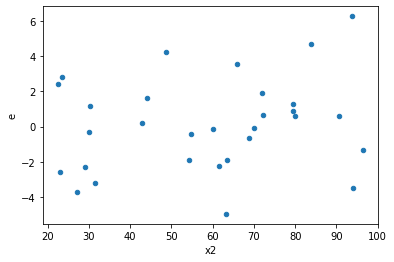

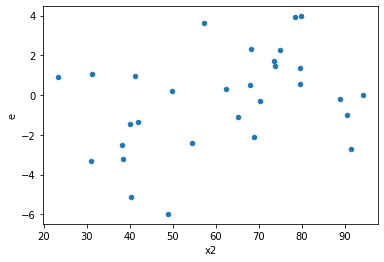

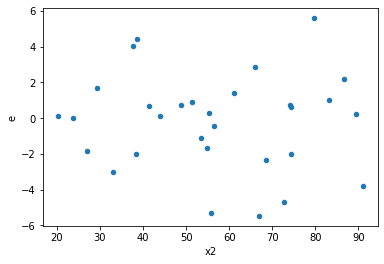

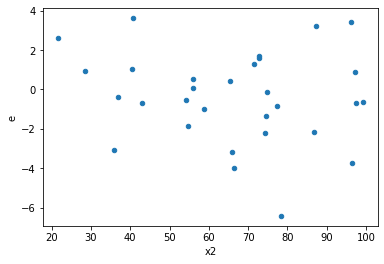

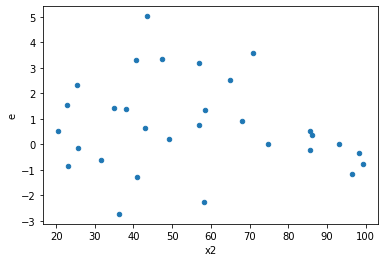

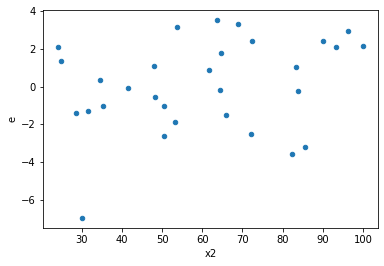

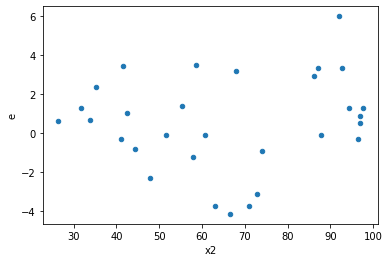

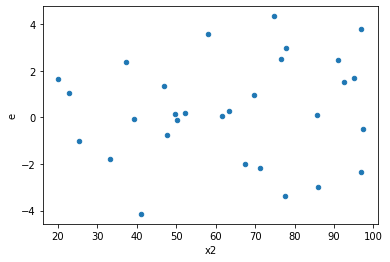

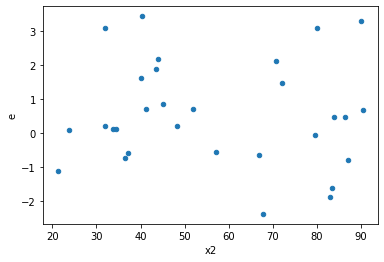

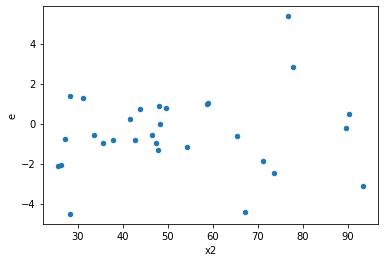

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,17.0,19.628172392081606,117.8651509651233,3.9256344784163213,6.933244174419018,1.7661461382966115,0.3473814595729894,0.8263092702135053,0.1736907297864947,Reject001=1 : Homoscedasticity
1.0,6.0,16.0,15.00954695387553,65.51435690673794,2.501591158979255,4.0946473066711215,1.6368171481473792,0.40215349430627567,0.7989232528468622,0.20107674715313784,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,54.0935672831002,68.03090805383874,4.917597025736382,6.1846280048944315,1.2576524616651197,0.7104619720678502,0.6447690139660749,0.3552309860339251,Reject001=1 : Homoscedasticity
4.0,7.0,15.0,5.541091601133344,63.558316177136646,0.7915845144476206,4.237221078475776,5.3528347272338594,0.006296390160359211,0.9968518049198204,0.0031481950801796055,Reject001=0 : Heteroscedasticity
9.0,8.0,14.0,24.7379276467609,70.66961979965724,3.0922409558451127,5.047829985689803,1.6324180611307586,0.403751550051362,0.798124224974319,0.201875775025681,Reject001=1 : Homoscedasticity
10.0,8.0,14.0,14.985912811598253,43.706036931200536,1.8732391014497816,3.121859780800038,1.6665570232779652,0.3852859158623154,0.8073570420688423,0.1926429579311577,Reject001=1 : Homoscedasticity
11.0,14.0,8.0,51.01718879161575,37.749375663357654,3.6440849136868394,4.718671957919707,1.2948852921063447,0.7338966469742885,0.6330516765128558,0.36694832348714423,Reject001=1 : Homoscedasticity
16.0,12.0,10.0,42.18030167123824,49.939125966848096,3.5150251392698535,4.99391259668481,1.4207331096704912,0.5864601079591572,0.7067699460204214,0.2932300539795786,Reject001=1 : Homoscedasticity
18.0,7.0,15.0,33.76295364983119,95.77510533476702,4.823279092833027,6.385007022317802,1.3237896666202391,0.6107051798896979,0.6946474100551511,0.30535258994484893,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,17.0,19.628172392081606,117.8651509651233,3.9256344784163213,6.933244174419018,1.7661461382966115,0.3473814595729894,Reject001=1 : Homoscedasticity
1.0,6.0,16.0,15.00954695387553,65.51435690673794,2.501591158979255,4.0946473066711215,1.6368171481473792,0.40215349430627567,Reject001=1 : Homoscedasticity
2.0,15.0,7.0,159.54228499613558,18.93079600123041,10.636152333075705,2.7043994287472013,0.2542648266081347,0.02483465274785132,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,54.0935672831002,68.03090805383874,4.917597025736382,6.1846280048944315,1.2576524616651197,0.7104619720678502,Reject001=1 : Homoscedasticity
4.0,7.0,15.0,5.541091601133344,63.558316177136646,0.7915845144476206,4.237221078475776,5.3528347272338594,0.006296390160359211,Reject001=0 : Heteroscedasticity
5.0,17.0,5.0,102.19811932322449,20.58435504621414,6.0116540778367344,4.116871009242828,0.6848150202821158,0.508015696807157,Reject001=1 : Homoscedasticity
6.0,6.0,16.0,51.835699945196076,59.07506367950994,8.639283324199345,3.692191479969371,0.42737242678767556,0.29991990512469147,Reject001=1 : Homoscedasticity
7.0,19.0,3.0,95.4050978081072,15.224526681760745,5.0213209372688,5.074842227253582,1.0106588068465294,0.8377323778673578,Reject001=1 : Homoscedasticity
8.0,4.0,18.0,16.00870407766114,43.665900971830006,4.002176019415285,2.425883387323889,0.6061411031287697,0.6734108367989509,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      967
Reject001=0 : Heteroscedasticity     33
Name: Result_test, dtype: int64